<a href="https://colab.research.google.com/github/doaa292/fourth-project/blob/main/Day9_dealing_with_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install pandas matplotlib seaborn --quiet

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('seaborn-v0_8-whitegrid')
sns.set_palette("colorblind")

print("✅ Libraries imported. Ready to analyze.")


✅ Libraries imported. Ready to analyze.


In [4]:
df_messy = pd.read_csv('/content/project4_Al tickets/sales_messy.csv')

print("RAW DATA — 5 Rows:")
print(df_messy.head())
print("\n RAW DATA — Info:")
print(df_messy.info())
print("\n RAW DATA — Describe (numeric):")
print(df_messy.describe())

RAW DATA — 5 Rows:
         Date Region  Units Sold  UnitPrice   revenue    Notes  Product 
0  2024-01-01   west          54        1.5       81.0  urgent       Tea
1  2024-01-02  north          39        3.0      117.0     NaN     Water
2  2024-01-03   EAST          51        3.0      153.0     NaN       Tea
3  2024-01-04  north          15        2.5       37.5               Tea
4  2024-01-05  north          12        2.0       24.0  urgent    Coffee

 RAW DATA — Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Date        205 non-null    object 
 1   Region      205 non-null    object 
 2   Units Sold  205 non-null    int64  
 3   UnitPrice   151 non-null    float64
 4    revenue    151 non-null    float64
 5   Notes       83 non-null     object 
 6    Product    205 non-null    object 
dtypes: float64(2), int64(1), object(4)
memory usag

In [12]:
df_messy.columns = df_messy.columns.str.strip()

df_clean = df_messy.drop_duplicates()

df_clean = df_clean.dropna(how="all")

df_clean = df_clean.rename(columns={"revenue($)": "revenue"})

df_clean["revenue"] = pd.to_numeric(df_clean["revenue"], errors='coerce')

df_clean["revenue"].fillna(df_clean["revenue"].mean(), inplace=True)

df_clean["Product"] = df_clean["Product"].str.strip()

df_clean = df_clean[df_clean["Product"].notna() & (df_clean["Product"] != "")]

df_clean.to_csv("sales_clean.csv", index=False)

print("CLEANED DATA:")
print(df_clean)
print(f"Rows reduced from {len(df_messy)} to {len(df_clean)}")

CLEANED DATA:
           Date  Region  Units Sold  UnitPrice    revenue   Notes Product
0    2024-01-01    west          54        1.5   81.00000  urgent     Tea
1    2024-01-02   north          39        3.0  117.00000     NaN   Water
2    2024-01-03    EAST          51        3.0  153.00000     NaN     Tea
3    2024-01-04   north          15        2.5   37.50000             Tea
4    2024-01-05   north          12        2.0   24.00000  urgent  Coffee
..          ...     ...         ...        ...        ...     ...     ...
195  2024-07-14    EAST          11        2.5   27.50000     NaN    Soda
196  2024-07-15  south           60        1.5   90.00000     NaN   Water
197  2024-07-16    west         104        1.5  156.00000  urgent    Soda
198  2024-07-17    EAST          18        NaN  133.57483           Water
199  2024-07-18   South          75        NaN  133.57483     NaN   Juice

[200 rows x 7 columns]
Rows reduced from 205 to 200


/tmp/ipython-input-1677913289.py:11: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_clean["revenue"].fillna(df_clean["revenue"].mean(), inplace=True)


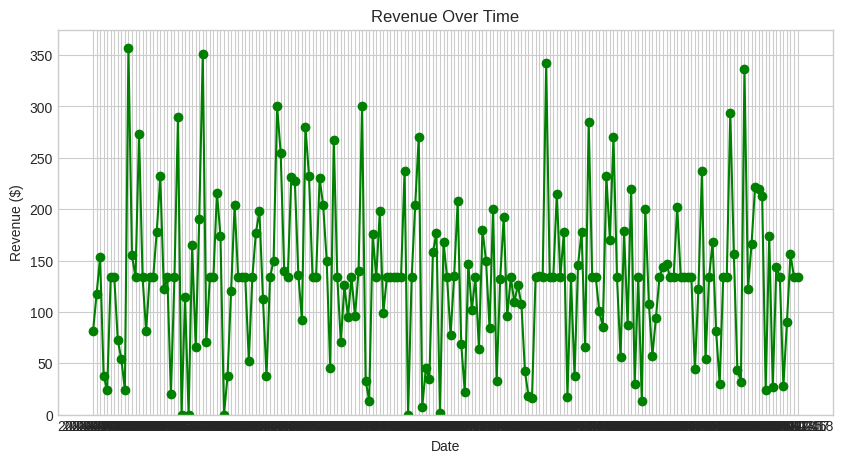

💡 Business Impact: Shows the true revenue growth and prevents misleading investors.


<Figure size 640x480 with 0 Axes>

In [26]:
# =========================
# Ticket 901 — Line Plot
# =========================
plt.figure(figsize=(10,5))
plt.plot(df_clean["Date"], df_clean["revenue"], 'go-', label="Revenue")
plt.title("Revenue Over Time")
plt.xlabel("Date")
plt.ylabel("Revenue ($)")
plt.ylim(0)
plt.grid(True)
plt.show()
print("💡 Business Impact: Shows the true revenue growth and prevents misleading investors.")
plt.savefig("Revenue Over Time.png")

/tmp/ipython-input-3705252768.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=product_revenue.index, y=product_revenue.values, palette="colorblind")


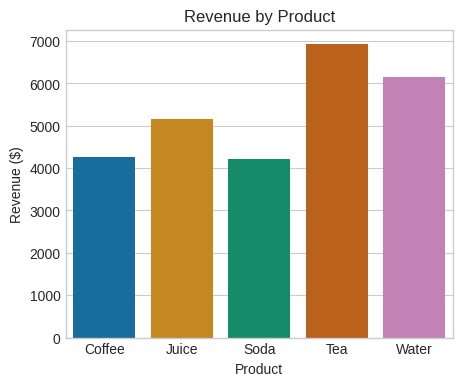

💡 Business Impact: Helps make marketing and strategic decisions.


In [30]:
# =========================
# 4Ticket 902 — Bar Chart
# =========================
product_revenue = df_clean.groupby("Product")["revenue"].sum()

plt.figure(figsize=(5,4))
sns.barplot(x=product_revenue.index, y=product_revenue.values, palette="colorblind")
plt.title("Revenue by Product")
plt.ylabel("Revenue ($)")
plt.show()

print("💡 Business Impact: Helps make marketing and strategic decisions.")

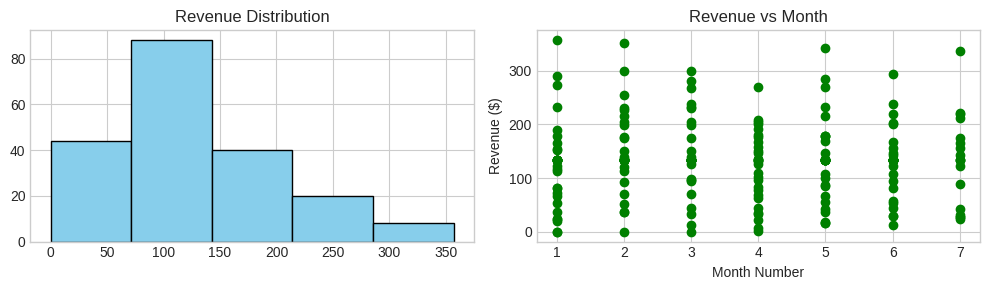

💡 Business Impact: Reveals revenue risks and monthly fluctuations.


In [34]:
# =========================
# Ticket 903 — Histogram + Scatter
# =========================
df_clean["MonthNum"] = pd.to_datetime(df_clean["Date"]).dt.month

plt.figure(figsize=(10,3))

plt.subplot(1,2,1)
plt.hist(df_clean["revenue"], bins=5, edgecolor='black', color='skyblue')
plt.title("Revenue Distribution")

plt.subplot(1,2,2)
plt.scatter(df_clean["MonthNum"], df_clean["revenue"], color='green')
plt.title("Revenue vs Month")
plt.xlabel("Month Number")
plt.ylabel("Revenue ($)")

plt.tight_layout()
plt.show()

print("💡 Business Impact: Reveals revenue risks and monthly fluctuations.")

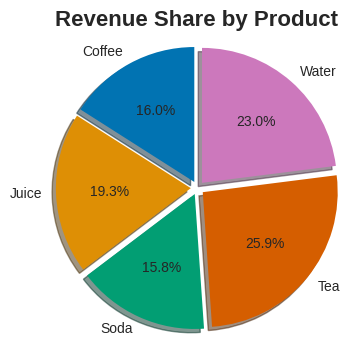

💡 Business Impact: Shows each product's share of revenue → supports sales and inventory strategies.


In [35]:
# =========================
# Ticket 904 — Pie Chart
# =========================
plt.figure(figsize=(4,4))
plt.pie(product_revenue, labels=product_revenue.index, autopct="%1.1f%%", startangle=90,
        colors=sns.color_palette("colorblind"), explode=[0.05]*len(product_revenue), shadow=True)
plt.title("Revenue Share by Product", fontsize=16, fontweight='bold')
plt.axis('equal')
plt.show()

print("💡 Business Impact: Shows each product's share of revenue → supports sales and inventory strategies.")

<Figure size 640x480 with 0 Axes>

In [18]:
df_clean.to_csv("sales_clean.csv", index=False)